  Label                                          EmailText
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
ham     4825
spam     747
Name: Label, dtype: int64
There are 5572 rows and 2 columns are present in Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Label        object
EmailText    object
dtype: object
       Label               EmailText
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                   

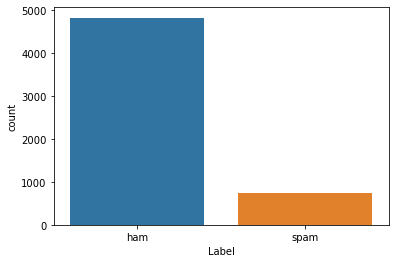

In [7]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#importing nlp toolkit
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
import string
#importing warnings
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("spam.csv")
print(df.head())
print(df.Label.value_counts())
print("There are {} rows and {} columns are present in Dataset ".format(df.shape[0],df.shape[1]))
df.info()
print(df.dtypes)
print(df.describe())
#describe the label column for better understanding
print(df.groupby("Label").describe().T)
print(df.isnull().sum())

#import missingno as msno
#msno.bar(df)
#plt.show()
sns.countplot(x='Label',data=df)
from collections import Counter
counter=Counter(df['Label'])
print()
print(counter)
duplicatedRow=df[df.duplicated()]
print(duplicatedRow[:])
df.drop_duplicates(inplace=True)
print()
print("There are {} rows and {} columns are present in Dataset ".format(df.shape[0],df.shape[1]))



In [11]:
#preprocessing
#stop words to find repeating words
from nltk.corpus import stopwords
def pre_processing(text):
    text=str(text).lower()
    spl_char_test=re.sub(r'[^a-z]','',text)
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc="".join(nopunc)
    clean_words=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]
    return clean_words

df['EmailText'].head().apply(pre_processing)

from sklearn.feature_extraction.text import CountVectorizer
# convvert a collection of EmailText to a matrix of tokens
bow=CountVectorizer(analyzer=pre_processing).fit_transform(df['EmailText'],df['Label'])
#dummies
df1=pd.get_dummies(df,columns=['Label'],drop_first=True)
print(df1)
bow.shape
#split dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(bow,df1["Label_spam"],test_size=0.2,random_state=0)

#import the SVM
from sklearn import svm
#import gridsearchCVto know the best parameters
from sklearn.model_selection import GridSearchCV
#step build a model
tuned_parameters={'kernel':['rbf','linear'],'gamma':[1e-3, 1e-4],'C':[1,10,100,1000]}
#train model withperform all kernals,gamma,C

#Build the model and fit to train and test
model = GridSearchCV(svm.SVC(), tuned_parameters)

#Build the model and fit to train and test
model.fit(X_train,y_train)
print(model.best_params_)

#train mdel using beat parameters
model1=svm.SVC(C=100,gamma=0.001,kernel='linear',probability=True)
model1.fit(X_train,y_train)
#predict model on test
y_pred=model1.predict(x_test)
y_pred_prob=model1.predict_proba(x_test)[:,1]
print(y_pred_prob)

                                              EmailText  Label_spam
0     Go until jurong point, crazy.. Available only ...           0
1                         Ok lar... Joking wif u oni...           0
2     Free entry in 2 a wkly comp to win FA Cup fina...           1
3     U dun say so early hor... U c already then say...           0
4     Nah I don't think he goes to usf, he lives aro...           0
...                                                 ...         ...
5567  This is the 2nd time we have tried 2 contact u...           1
5568             Will Ã_ b going to esplanade fr home?           0
5569  Pity, * was in mood for that. So...any other s...           0
5570  The guy did some bitching but I acted like i'd...           0
5571                         Rofl. Its true to its name           0

[5169 rows x 2 columns]
{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
[0.00237566 0.00782815 0.00021287 ... 0.00035275 0.00045394 0.01804209]


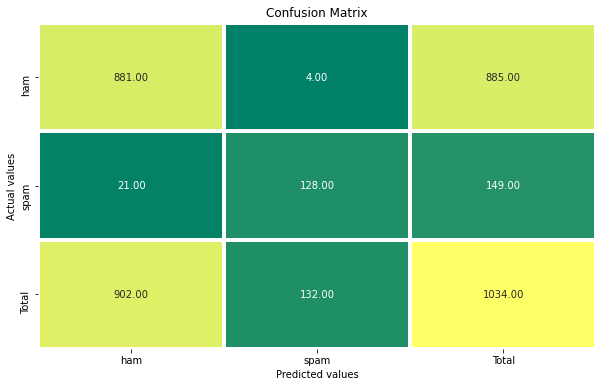

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.97      0.86      0.91       149

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034


************************************Kappa Score************************************


Kappa Score = 0.8971013223574744

******************************Area Under Curve Score******************************


AUC Score = 0.9272703143366322
Number of probabality to build ROC= 63


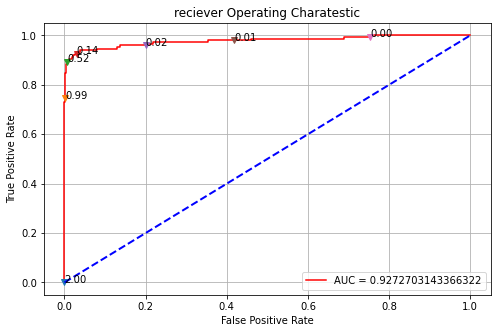

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score,roc_auc_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    cm=confusion_matrix(y_test,y_pred)
    row_sum=cm.sum(axis=0)
    cm=np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum=cm.sum(axis=1)
    cm=np.append(cm,col_sum.reshape(-1,1),axis=1)
    labels=label+['Total']
    plt.figure(figsize=(10,6))
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,yticklabels=labels,linewidths=3,cbar=None)
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.title('Confusion Matrix')
    plt.show()
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    cr = classification_report(y_test,y_pred)
    print(cr)
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
    roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
    print('AUC Score =',roc_a)
    plt.figure(figsize=(8,5))
    fpr,tpr, thresh = roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,'r')
    print('Number of probabality to build ROC=',len(fpr))
    if verbose==True:
            for i in range(len(thresh)):
                if i%n==0:
                    plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                    plt.plot(fpr[i],tpr[i],'v')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('reciever Operating Charatestic')
    plt.legend(['AUC = {}'.format(roc_a)])
    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    plt.grid()
    plt.show()

class threshold():
    def __init__(self):
        elf.th=0.5
    def preict_threshold(self,y):
        if y>=self.th:
            return 1
        else:
            return 0
        
classification_metric(y_test,y_pred,y_pred_prob,['ham','spam'],n=10,verbose=True)
    